<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/project1_Final_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations

A scatterplot is not the best option for comparing marital status with hours worked and number of children. It is hard to see any trends here as there are not many grouping of colors given this dataset. Below are two other graphs (histplot and barplot) that provide some interesting findings comparing marital status and hours worked.

In [1]:
# Hours worked a week - HRS1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/imdressel/project_gss17/main/gss_data_20182022.csv')
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,NaN,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,NaN,NaN


<Axes: xlabel='hrs1', ylabel='Count'>

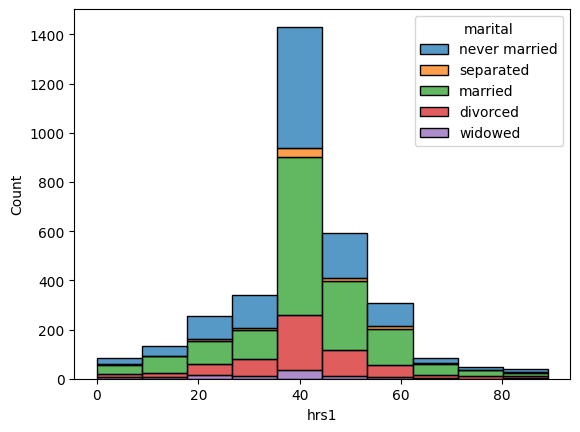

In [2]:
# compare marital status with hours worked a week using a histplot
sns.histplot(data=df, x=df['hrs1'], hue=df['marital'], bins=10, multiple = 'stack')
plt.title('Count vs. Hours Worked A Week')
plt.xlabel('Hours Worked A Week')

# 1. Histplot: Compare marital status with hours worked a week.

The histplot above has some interesting findings:

1. The highest categories of marital status across all bins is "married" and "never married". The category "married" makes up the largest category and "never married" is second. This makes sense because most people either have a spouse or are single/dating.

2. Around 40 hours per week has the highest count by far than any other bin. This is the average number of hours worked per week with the lowest being 0 and highest being just above 80 hours per week. Additionally, all categories inclduding never married, separated, married, divorced, and widowed have the largest proportion in this bin compared to any other bin.

3. Widowed individuals worked between 20-40 hours a week.

4. The category "married" has the highest proportion in all bins. This could be due to many spouses being able to work part-time (or stay at home full-time) while their spouse work full-time. This could be attributed to having children to take care of where it is necessary for a parent to devout time to their children instead of work. Working part-time would allow married couples to spend time and take care of their children.

In [3]:
mean_hrs = df.groupby('marital')['hrs1'].mean()
mean_hrs

marital
divorced         41.600365
married          41.142371
never married    39.858047
separated        42.800000
widowed          34.774510
Name: hrs1, dtype: float64

Text(0, 0.5, 'Hours Worked A Week')

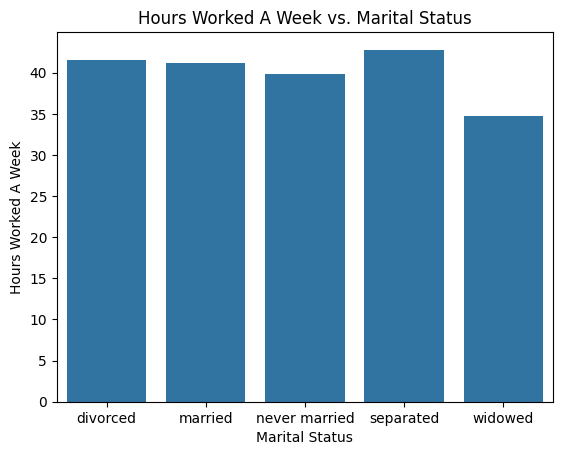

In [5]:
## barplot: graph marital status by mean hours worked a week
sns.barplot(data=mean_hrs)

plt.title('Hours Worked A Week vs. Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked A Week')

# 2. Barplot: Compare marital status with mean hours worked a week.

Barplot Findings:
1. All categories are prety comparable when it comes to mean hours worked a week (around 40 hours) except widowed, which is significantly less at around 35 hours a week.

2. Separated individuals worked the most on average at above 40 hours a week. This could be due to these individuals investing less time into a relationship and more on themselves and their work life.

3. Never married individuals worked slightly less than the other categories (almost but not quite 40 hours a week). They are either dating or single so they could be focusing time on a significant other, on themselves, or on spending time with friends. Therefore, they work less than the other categories (divorced, married and separated).

In [7]:
#Splitting into two years
df18 = df[df['year']== 2018]
df22 = df[df['year']== 2022]

In [8]:
#Income by marital status in 2018
s_by_mar18 = df18.groupby('marital')['conrinc'].mean()
s_by_mar18
s_by_mar18_df = pd.DataFrame(s_by_mar18)

#Income by marital status in 2022
s_by_mar22 = df22.groupby('marital')['conrinc'].mean()
s_by_mar22
#On average - in 2022, salaries by each category of marriage type are higher than their counterparts in 2018 (besides divorced)
s_by_mar22_df = pd.DataFrame(s_by_mar22)

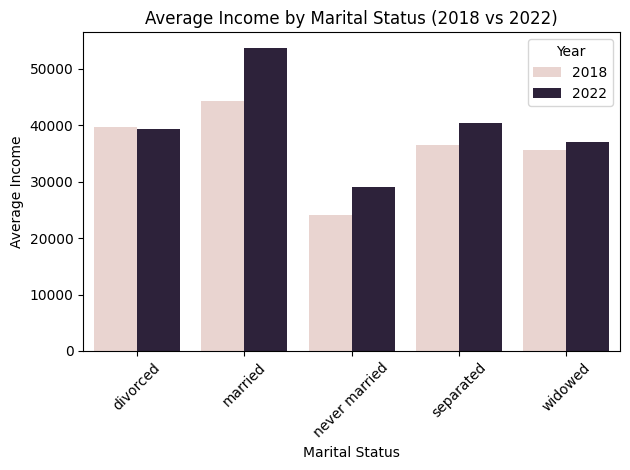

In [9]:
#Combined Plot
s_by_mar18_df['year'] = 2018
s_by_mar22_df['year'] = 2022

comb_data = pd.concat([s_by_mar18_df, s_by_mar22_df])

sns.barplot(x='marital', y='conrinc', hue='year', data=comb_data)
plt.title('Average Income by Marital Status (2018 vs 2022)')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
#On average, income is higher in 2022 for all categories (except for slightly lower in the divorced section).
#Married people tend to have higher incomes, and never married people tend to have the lowest incomes.